In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
cd /Users/diegovidelasilva/Diplomado_IA/M2_U4

/Users/diegovidelasilva/Diplomado_IA/M2_U4


In [9]:
cranberry_cinta = cv2.imread('cranberry_cinta.jpg')
cranberry_merma = cv2.imread('cranberry_merma.jpg')

In [10]:
cranberry_cinta = cv2.cvtColor(cranberry_cinta, cv2.COLOR_BGR2RGB)
cranberry_merma = cv2.cvtColor(cranberry_merma, cv2.COLOR_BGR2RGB)

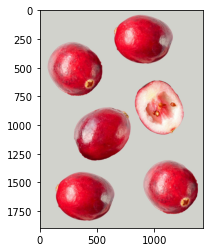

In [11]:
plt.imshow(cranberry_cinta)

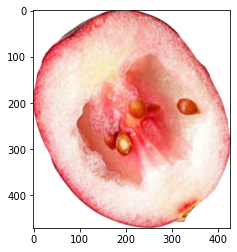

In [12]:
plt.imshow(cranberry_merma)

In [15]:
# Extraer caracteristicas de las imagenes

caract_imagen = cv2.xfeatures2d.SIFT_create()

In [16]:
# Claves (kp) y descripciones (ds)

kp1,ds1 = caract_imagen.detectAndCompute(cranberry_cinta, None)
kp2,ds2 = caract_imagen.detectAndCompute(cranberry_merma, None)

In [60]:
ds1,ds2

(array([[57., 86.,  9., ...,  0.,  0.,  2.],
        [30., 15.,  0., ...,  0.,  0., 16.],
        [59., 96.,  6., ...,  0., 12., 23.],
        ...,
        [17.,  0.,  0., ...,  1.,  1.,  4.],
        [ 1.,  0.,  0., ...,  0.,  0.,  2.],
        [31.,  9.,  0., ...,  0.,  0.,  1.]], dtype=float32),
 array([[ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 7.,  4., 10., ...,  0.,  0.,  0.],
        [ 5.,  5.,  2., ...,  0.,  0., 32.],
        ...,
        [17., 30.,  3., ...,  0.,  0., 31.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  2., ...,  0.,  0.,  0.]], dtype=float32))

In [19]:
# Creacion de un diccionario de 2 variables

indice = dict(algorithm=0, trees=5)
busqueda = dict(checks=50)

In [20]:
# Buscar el emparejamiento entre ambas imagenes

flan = cv2.FlannBasedMatcher(indice,busqueda)

In [23]:
emparejamiento = flan.knnMatch(ds1, ds2, k=2)

In [52]:
# Buscar los mejores emparejamientos entre ambas imagenes, buscando cual tiene una menor distancia entre ellos

mejores = []
for e1, e2 in emparejamiento:
    if e1.distance < 0.1*e2.distance:
        mejores.append([e1])


In [53]:
e1.distance

193.0880584716797

In [54]:
e2.distance

217.92889404296875

In [55]:
mejores

[[<DMatch 0x12731f790>],
 [<DMatch 0x12731fa50>],
 [<DMatch 0x12731fd50>],
 [<DMatch 0x12734c210>],
 [<DMatch 0x12734c390>],
 [<DMatch 0x12734c3d0>],
 [<DMatch 0x12734c4d0>],
 [<DMatch 0x12734c590>],
 [<DMatch 0x12734c690>],
 [<DMatch 0x12734c6d0>],
 [<DMatch 0x12734ca90>],
 [<DMatch 0x12734cc50>],
 [<DMatch 0x12734ccd0>],
 [<DMatch 0x12734cdd0>],
 [<DMatch 0x12733e150>],
 [<DMatch 0x12733e250>],
 [<DMatch 0x12733e2d0>],
 [<DMatch 0x12733e3d0>],
 [<DMatch 0x12733e510>],
 [<DMatch 0x12733e590>],
 [<DMatch 0x12733eb90>],
 [<DMatch 0x12733ee50>],
 [<DMatch 0x12733ef10>],
 [<DMatch 0x12731c090>],
 [<DMatch 0x12731c110>],
 [<DMatch 0x12731c890>],
 [<DMatch 0x12731c910>],
 [<DMatch 0x12731ca10>],
 [<DMatch 0x12731cb50>],
 [<DMatch 0x12731cd50>],
 [<DMatch 0x127334510>],
 [<DMatch 0x127334610>],
 [<DMatch 0x127334710>],
 [<DMatch 0x127334810>],
 [<DMatch 0x127334a50>],
 [<DMatch 0x127334a90>],
 [<DMatch 0x127334ad0>],
 [<DMatch 0x127334b10>],
 [<DMatch 0x127334c10>],
 [<DMatch 0x127334c50>],


In [56]:
imagen_emparejamientos = cv2.drawMatchesKnn(cranberry_cinta,kp1,cranberry_merma,kp2, mejores[0:30],None,flags=0)

In [57]:
imagen_emparejamientos = cv2.cvtColor(imagen_emparejamientos, cv2.COLOR_BGR2RGB)

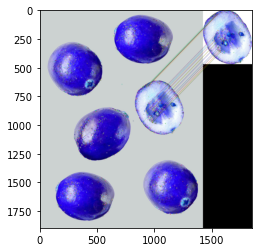

In [58]:
plt.imshow(imagen_emparejamientos)

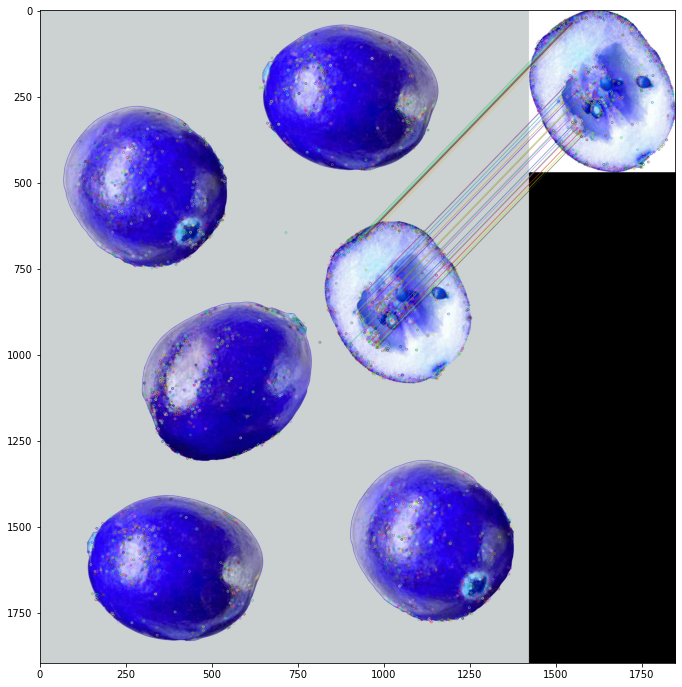

In [59]:
figura = plt.figure(figsize=(12,12))
lienzo = figura.add_subplot(111)
lienzo.imshow(imagen_emparejamientos)